In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upload data from Colab
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Dataset.csv")
df.head()

Saving Dataset_2.csv to Dataset_2.csv


FileNotFoundError: [Errno 2] No such file or directory: 'Dataset.csv'

In [ ]:
# Check the data shape
df.shape

(144, 3)

In [ ]:
# Get information about the data types and potential missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      144 non-null    object 
 1   BtcPrice  144 non-null    float64
 2   SpPrice   144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [ ]:
# Check for missing values
df.isna().sum()

Date        0
BtcPrice    0
SpPrice     0
dtype: int64

In [ ]:
# Get summary statistics of the data
df.describe()

,BtcPrice,SpPrice
count,144.000000,144.000000
mean,47603.660417,4246.002847
std,9744.625630,290.219592
min,29359.900000,3700.650000
25%,38176.725000,4000.737500
50%,48426.100000,4273.950000
75%,56428.050000,4458.580000
max,67527.900000,4712.020000


<Axes: ylabel='count'>

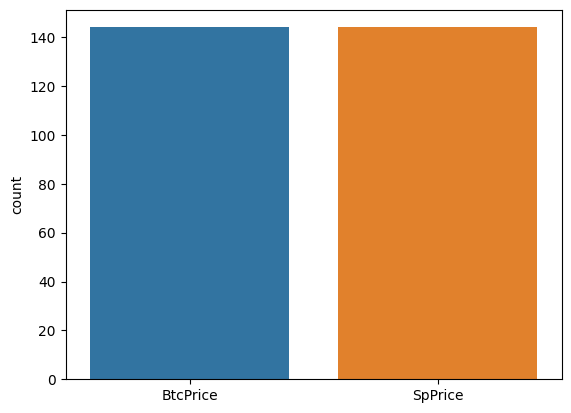

In [ ]:
#see the distribution of categorical variables
sns.countplot(df)

In [ ]:
# Convert the 'Date' column to datetime format for time-based analysis
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#print(df['Date'].head(3))

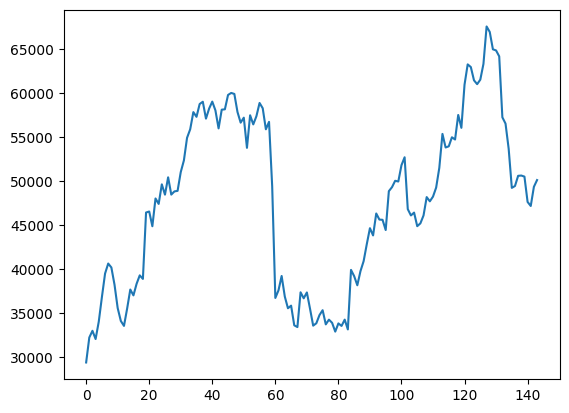

In [ ]:
# Plot the price movements of Bitcoin
plt.plot(df.index, df['BtcPrice'])

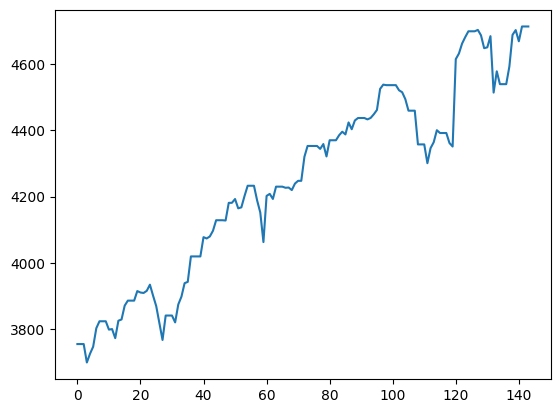

In [ ]:
# Plot the price movements of S&P500
plt.plot(df.index, df['SpPrice'])

In [ ]:
# Attempted to plot both Bitcoin and S&P500 on the same plot
#plt.plot(df.index, df['BtcPrice'], df['SpPrice'])

In [ ]:
# Calculate daily percentage change for Bitcoin prices
df['Bitcoin_Daily_Return'] = df['BtcPrice'].pct_change() * 100  # Percentage change for Bitcoin
# Calculate daily percentage change for S&P500 prices
df['S&P500_Daily_Return'] = df['SpPrice'].pct_change() * 100   # Percentage change for S&P500
print(df)

           Date  BtcPrice  SpPrice  Bitcoin_Daily_Return  S&P500_Daily_Return
0    2021-01-01   29359.9  3756.07                   NaN                  NaN
1    2021-01-02   32193.3  3756.07              9.650578             0.000000
2    2021-01-03   32958.9  3756.07              2.378135             0.000000
3    2021-01-04   32022.6  3700.65             -2.840811            -1.475478
4    2021-01-05   33991.5  3726.86              6.148470             0.708254
..          ...       ...      ...                   ...                  ...
139  2021-12-08   50473.9  4701.21             -0.239746             0.308529
140  2021-12-09   47596.6  4667.45             -5.700570            -0.718113
141  2021-12-10   47137.2  4712.02             -0.965195             0.954911
142  2021-12-11   49314.5  4712.02              4.619069             0.000000
143  2021-12-12   50081.0  4712.02              1.554310             0.000000

[144 rows x 5 columns]


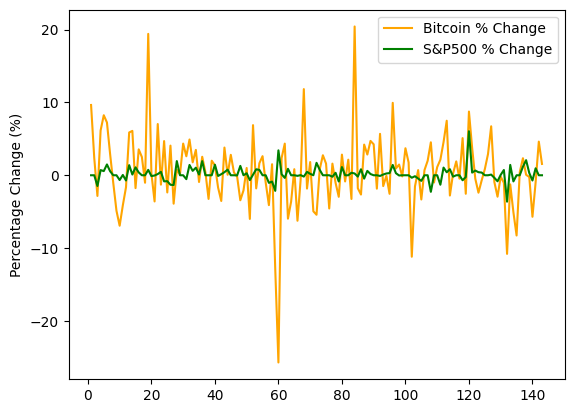

In [ ]:
# Plot the daily percentage change for Bitcoin and S&P500
plt.plot(df.index, df['Bitcoin_Daily_Return'], label='Bitcoin % Change', color='orange')
plt.plot(df.index, df['S&P500_Daily_Return'], label='S&P500 % Change', color='green')
plt.ylabel('Percentage Change (%)')
plt.legend()

In [ ]:
# To calculate weekly returns:
df['Bitcoin_Weekly_Return'] = df['BtcPrice'].pct_change(periods=7)
df['S&P500_Weekly_Return'] = df['SpPrice'].pct_change(periods=7)

print(df)

          Date  BtcPrice  SpPrice  BtcPctChange  SpPctChange  \
0   2021-01-01   29359.9  3756.07           NaN          NaN   
1   2021-01-02   32193.3  3756.07      9.650578     0.000000   
2   2021-01-03   32958.9  3756.07      2.378135     0.000000   
3   2021-01-04   32022.6  3700.65     -2.840811    -1.475478   
4   2021-01-05   33991.5  3726.86      6.148470     0.708254   
..         ...       ...      ...           ...          ...   
139 2021-12-08   50473.9  4701.21     -0.239746     0.308529   
140 2021-12-09   47596.6  4667.45     -5.700570    -0.718113   
141 2021-12-10   47137.2  4712.02     -0.965195     0.954911   
142 2021-12-11   49314.5  4712.02      4.619069     0.000000   
143 2021-12-12   50081.0  4712.02      1.554310     0.000000   

     Bitcoin_Weekly_Return  S&P500_Weekly_Return  
0                      NaN                   NaN  
1                      NaN                   NaN  
2                      NaN                   NaN  
3                      NaN 

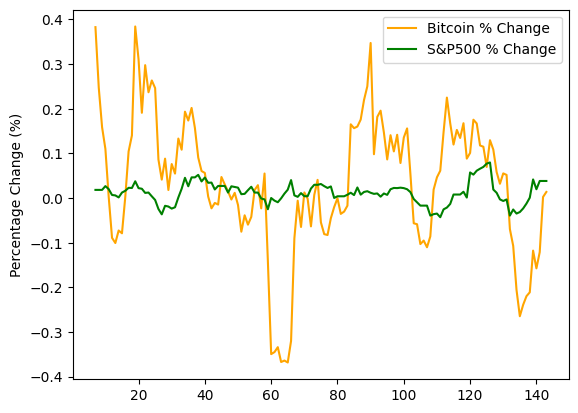

In [ ]:
# Plot the weekly percentage change for Bitcoin and S&P500
plt.plot(df.index, df['Bitcoin_Weekly_Return'], label='Bitcoin % Change', color='orange')
plt.plot(df.index, df['S&P500_Weekly_Return'], label='S&P500 % Change', color='green')
plt.ylabel('Percentage Change (%)')
plt.legend()

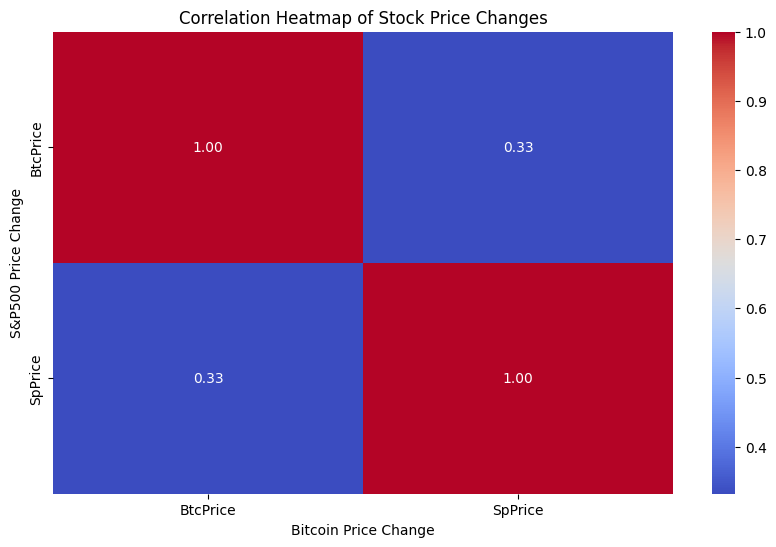

In [ ]:
# Calculate correlation coefficient between Bitcoin and S&P500 price changes
correlation_matrix = df[['BtcPrice', 'SpPrice']].corr()  # Calculate correlation

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)  # Customize as needed

# Add labels and title
ax.set_xlabel('Bitcoin Price Change')
ax.set_ylabel('S&P500 Price Change')
ax.set_title('Correlation Heatmap of Stock Price Changes')

plt.show()

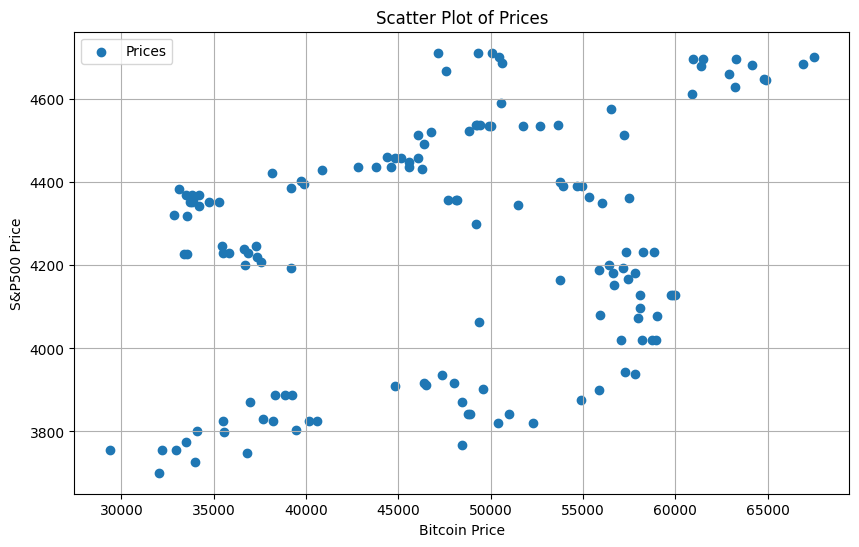

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Set plot dimensions

# Plot Bitcoin price on x-axis and S&P500 price on y-axis
plt.scatter(df['BtcPrice'], df['SpPrice'], label='Prices')

# Add labels and title
plt.xlabel('Bitcoin Price')
plt.ylabel('S&P500 Price')
plt.title('Scatter Plot of Prices')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)  # Add gridlines for better readability (optional)
plt.show()

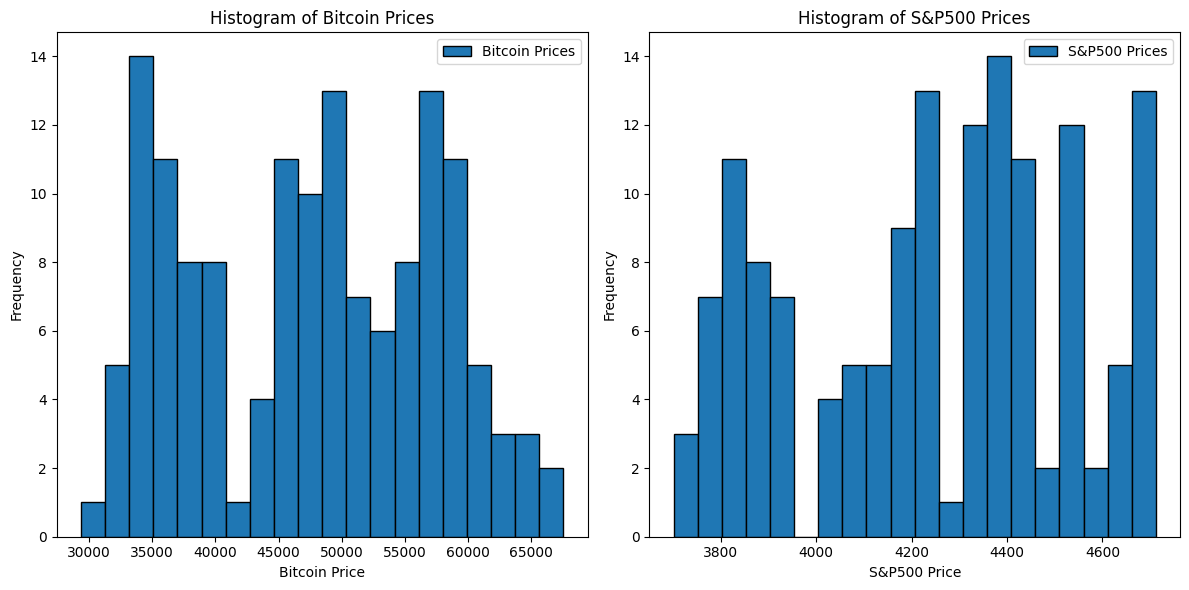

In [ ]:
# Create the histogram plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Create 2 subplots for each stock

# Plot histograms for Bitcoin and S&P500 in separate subplots
ax1.hist(df['BtcPrice'], bins=20, edgecolor='black', label='Bitcoin Prices')
ax2.hist(df['SpPrice'], bins=20, edgecolor='black', label='S&P500 Prices')

# Add labels and title for each subplot
ax1.set_xlabel('Bitcoin Price')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Bitcoin Prices')
ax1.legend()

ax2.set_xlabel('S&P500 Price')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of S&P500 Prices')
ax2.legend()

# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Standard Deviation (annualized)
std_dev_btc = df['Bitcoin_Daily_Return'].std() * np.sqrt(252)  # Annualize by multiplying by sqrt(252) (assuming daily data)
std_dev_sp500 = df['S&P500_Daily_Return'].std() * np.sqrt(252)

# Another Volatility Measure (using Interquartile Range)
iqr_btc = df['Bitcoin_Daily_Return'].quantile(0.75) - df['Bitcoin_Daily_Return'].quantile(0.25)
iqr_sp500 = df['S&P500_Daily_Return'].quantile(0.75) - df['S&P500_Daily_Return'].quantile(0.25)

# Print results
print("Standard Deviation (Annualized):")
print(f"Bitcoin: {std_dev_btc:.2%}")
print(f"S&P500: {std_dev_sp500:.2%}")

print("\nInterquartile Range:")
print(f"Bitcoin: {iqr_btc:.4f}")
print(f"S&P500: {iqr_sp500:.4f}")

Standard Deviation (Annualized):
Bitcoin: 8191.04%
S&P500: 1519.56%

Interquartile Range:
Bitcoin: 4.6738
S&P500: 0.5007


In [ ]:
# Calculate correlation coefficient
correlation = df['Bitcoin_Daily_Return'].corr(df['S&P500_Daily_Return'])

# Print result
print(f"Correlation Coefficient between Bitcoin and S&P500 Daily Returns: {correlation:.4f}")

Correlation Coefficient between Bitcoin and S&P500 Daily Returns: 0.1495


In [ ]:
# Calculate summary statistics for Bitcoin prices
bitcoin_stats = df['BtcPrice'].describe()

# Print Bitcoin statistics
print("Bitcoin Price Statistics (2021):")
print(bitcoin_stats)

# Calculate summary statistics for S&P500 prices
sp500_stats = df['SpPrice'].describe()

# Print S&P500 statistics
print("\nS&P500 Price Statistics (2021):")
print(sp500_stats)

Bitcoin Price Statistics (2021):
count      144.000000
mean     47603.660417
std       9744.625630
min      29359.900000
25%      38176.725000
50%      48426.100000
75%      56428.050000
max      67527.900000
Name: BtcPrice, dtype: float64

S&P500 Price Statistics (2021):
count     144.000000
mean     4246.002847
std       290.219592
min      3700.650000
25%      4000.737500
50%      4273.950000
75%      4458.580000
max      4712.020000
Name: SpPrice, dtype: float64


In [ ]:
# Calculate additional statistics
bitcoin_stats = df['Bitcoin_Daily_Return'].describe()
sp500_stats = df['S&P500_Daily_Return'].describe()

# Calculate maximum drawdown for each asset
def calculate_max_drawdown(returns):
  """
  This function calculates the maximum drawdown for a series of returns.
  """
  peak_to_trough = returns.cummax() - returns  # Running difference between peak and current value
  return peak_to_trough.max()

max_drawdown_bitcoin = calculate_max_drawdown(df['Bitcoin_Daily_Return'])
max_drawdown_sp500 = calculate_max_drawdown(df['S&P500_Daily_Return'])

# Print results
print("Bitcoin Daily Return Statistics (2021):")
print(bitcoin_stats)
print("\nMaximum Drawdown (Bitcoin):", max_drawdown_bitcoin)

print("\nS&P500 Daily Return Statistics (2021):")
print(sp500_stats)
print("\nMaximum Drawdown (S&P500):", max_drawdown_sp500)

Bitcoin Daily Return Statistics (2021):
count    143.000000
mean       0.005086
std        0.051599
min       -0.257098
25%       -0.018351
50%        0.004275
75%        0.028387
max        0.204309
Name: Bitcoin_Daily_Return, dtype: float64

Maximum Drawdown (Bitcoin): 0.4512357987512662

S&P500 Daily Return Statistics (2021):
count    143.000000
mean       0.001632
std        0.009572
min       -0.036262
25%       -0.000571
50%        0.000000
75%        0.004436
max        0.060458
Name: S&P500_Daily_Return, dtype: float64

Maximum Drawdown (S&P500): 0.09671987707196872
